In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

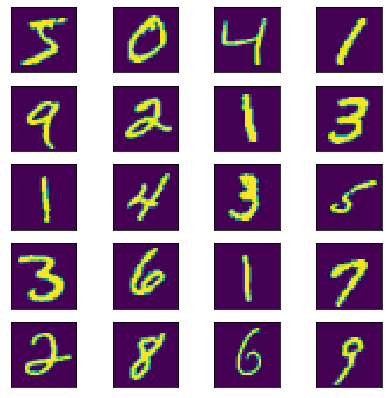

In [8]:
plt.figure(figsize=(7,7))
for x in range(20):
    plt.subplot(5, 4, x+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[x])
plt.show()

In [9]:
x_test=x_test.reshape((x_test.shape[0],28, 28,1))

In [10]:
x_train=x_train.reshape((x_train.shape[0],28, 28,1))

In [11]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [13]:
a=model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [14]:
history=model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.2249 - acc: 0.9458 - val_loss: 0.0764 - val_acc: 0.9763
Epoch 2/5
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0630 - acc: 0.9808 - val_loss: 0.0704 - val_acc: 0.9801
Epoch 3/5
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0504 - acc: 0.9843 - val_loss: 0.0474 - val_acc: 0.9859
Epoch 4/5
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0438 - acc: 0.9864 - val_loss: 0.0488 - val_acc: 0.9866
Epoch 5/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0367 - acc: 0.9887 - val_loss: 0.0542 - val_acc: 0.9840


F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


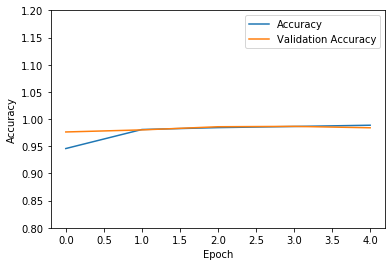

In [34]:
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.8,1.2)
plt.legend(loc='upper_right')
plt.show()


In [35]:
test_loss, test_acc= model.evaluate(x_test, y_test, verbose=2)

10000/1 - 4s - loss: 0.0324 - acc: 0.9840


In [36]:
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

Test Loss:  0.05415225564179127
Test Accuracy:  0.984
